# Setup

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors mediapy accelerate

Execute in terminal

    !apt-get update && apt-get install libgl1 
    !pip uninstall accelerate


In [16]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
#, DPMSolverSinglestepScheduler, LMSDiscreteScheduler, HeunDiscreteScheduler, PNDMScheduler, EulerDiscreteScheduler

import torch
import mediapy as media

#@markdown Choose your desired model here. Keep in midn that each model needs to be downloaded once it can be used, so keep system RAM in mind. Don't forget to run this cell before moving on. 

model_id = "prompthero/openjourney"
#model_id = "nitrosocke/Future-Diffusion" #@param ["stabilityai/stable-diffusion-2-1", "stabilityai/stable-diffusion-2-base", "runwayml/stable-diffusion-v1-5", "SG161222/Realistic_Vision_V1.3", "prompthero/openjourney", "jzli/DreamShaper-3.32", "nitrosocke/redshift-diffusion","nitrosocke/elden-ring-diffusion", "nitrosocke/Future-Diffusion", "nitrosocke/mo-di-diffusion" ]


# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# scheduler_id = DPMSolverMultistepScheduler #@param ["DPMSolverMultistepScheduler", "DPMSolverSinglestepScheduler", "LMSDiscreteScheduler", "HeunDiscreteScheduler", "PNDMScheduler", "EulerDiscreteScheduler"]

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

#@markdown Some models are better at some things than others. As an example try "Realistic Vision" for portraits. Experiment with different models as well as negative prompt (see below)! 

disable_safety_filter = True #@param {type:"boolean"}

#@markdown Be careful when disabling the NSFW filter as some networks tend to produce explicit content.  

if disable_safety_filter == True:
  def dummy(images, **kwargs):
      return images, False
  pipe.safety_checker = dummy

Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 45262.27it/s]


# Run

100%|██████████| 55/55 [00:14<00:00,  3.88it/s]


,,,,

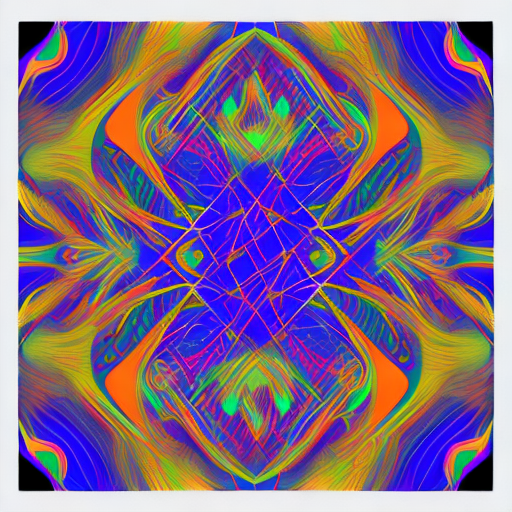
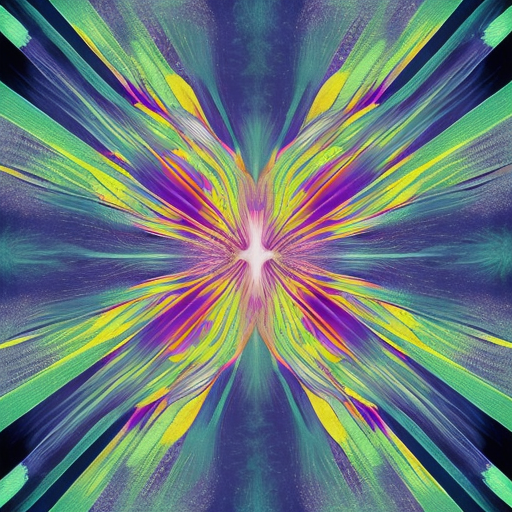
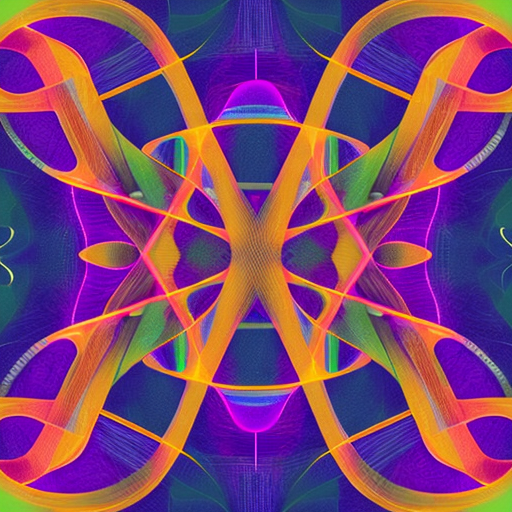
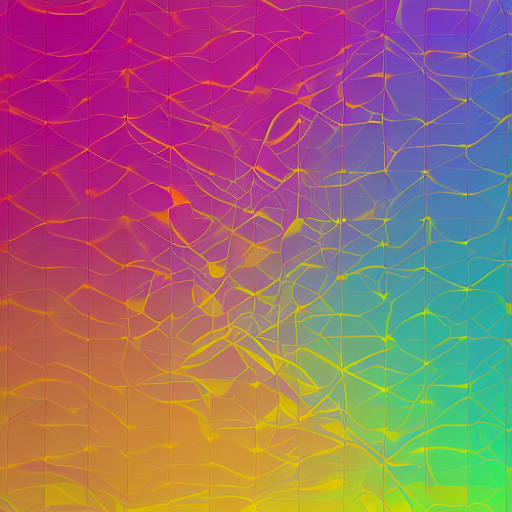
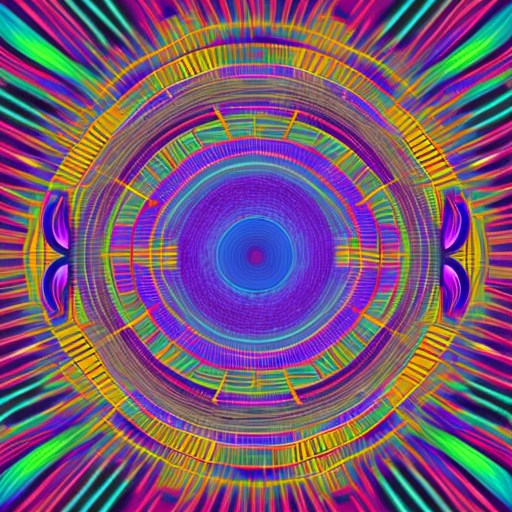

In [21]:
#@title test2img Inference { display-mode: "form" }

import random

prompt = ""
seed = 1

def get_inputs(batch_size=1):
  global seed
  seed = random.randint(1,999999999)
  #seed = 703468167

  generator = [torch.Generator("cuda").manual_seed(i) for i in range(seed, (batch_size+seed))]                                                                                                                                                             
                                                                                                     
  global prompt
  prompt = "abstract musical patterns, jazz visualised, alternative, post modern millennial colors, basic abstract shapes, --ar 9:16 --test --uplight"
  prompts = batch_size * [prompt]  

  negative_prompt = "" #@param {type:"string"}
  negative_prompts = batch_size * [negative_prompt]  

  num_inference_steps = 55 #@param {type:"slider", min:0, max:100, step:1}
  guidance_scale = 8.5 #@param {type:"slider", min:0, max:10, step:0.1}
  image_size = 512 #@param [384, 512, 768] {type:"raw"}

  return {
      "prompt": prompts,
      "negative_prompt": negative_prompts, 
      "height": image_size, 
      "width": image_size,
      "num_inference_steps": num_inference_steps, 
      "guidance_scale": guidance_scale,
      "generator": generator
      }    

batch_size = 5 #@param {type:"slider", min:1, max:10, step:1}

images = pipe(**get_inputs(batch_size)).images
media.show_images(images)

for image in images:
#    if 'count' in locals():
#        count = count+1
#    else: 
#        count = 1
    count = count+1
    image = image.save("outputs/text2img/image_"+str(count)+"_"+str(seed)+"_"+prompt[:50]+".jpg")

    
